In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from LinearModel import *
import sklearn

In [2]:
emi_com = pd.read_csv("/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/emi_com.csv")
temp = pd.read_csv("/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/temp.csv")


In [3]:
emi_com

,Unnamed: 0,Date,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,0,1973-01-01,2.869340,Petroleum,218.972,76.314422
1,612,1973-01-01,22.853899,Natural Gas,125.557,5.493898
2,611,1973-01-01,2.427938,Natural Gas,125.557,51.713427
3,1273,1973-01-01,0.971831,Coal,109.552,112.727474
4,865,1973-02-01,2.198380,Natural Gas,113.750,51.742646
...,...,...,...,...,...,...
1867,763,2023-10-01,2.523908,Natural Gas,131.738,52.196043
1868,1372,2023-10-01,0.636075,Coal,60.868,95.693148
1869,1422,2023-11-01,0.633978,Coal,60.515,95.452783
1870,152,2023-11-01,3.471397,Petroleum,190.101,54.762110


In [4]:
emi_com['Emission per Consumption'] = emi_com['Emission (Mton Co2)'] / emi_com['Consumption (quadrillion Btu)']

In [5]:
emi_com['Date'] = pd.to_datetime(emi_com['Date'])

In [6]:
emi_com = emi_com.loc[emi_com['Consumption (quadrillion Btu)'] < 15]

In [7]:
#emi_com = emi_com.loc[emi_com['Energy Class'] == 'Petroleum']


In [8]:
emi_com

,Unnamed: 0,Date,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,0,1973-01-01,2.869340,Petroleum,218.972,76.314422
2,611,1973-01-01,2.427938,Natural Gas,125.557,51.713427
3,1273,1973-01-01,0.971831,Coal,109.552,112.727474
4,865,1973-02-01,2.198380,Natural Gas,113.750,51.742646
5,203,1973-02-01,2.908295,Petroleum,202.519,69.634951
...,...,...,...,...,...,...
1867,763,2023-10-01,2.523908,Natural Gas,131.738,52.196043
1868,1372,2023-10-01,0.636075,Coal,60.868,95.693148
1869,1422,2023-11-01,0.633978,Coal,60.515,95.452783
1870,152,2023-11-01,3.471397,Petroleum,190.101,54.762110


In [9]:
#if energy class is petrol, delete energy types that are not total 



/var/folders/wk/48ywwld12k3b18wmjf4yr1080000gn/T/ipykernel_24436/3745996017.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=emi_com,x='Date',y='Emission (Mton Co2)',hue='Energy Class',ci=None)


<Axes: xlabel='Date', ylabel='Emission (Mton Co2)'>

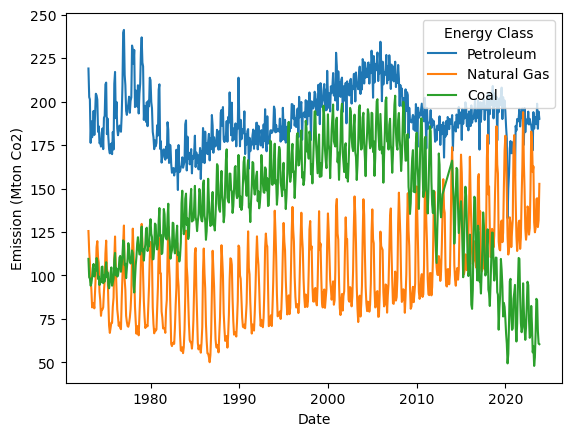

In [10]:
sns.lineplot(data=emi_com,x='Date',y='Emission (Mton Co2)',hue='Energy Class',ci=None)

/var/folders/wk/48ywwld12k3b18wmjf4yr1080000gn/T/ipykernel_24436/3143046636.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=emi_com,x='Date',y='Consumption (quadrillion Btu)',hue='Energy Class',ci=None)


<Axes: xlabel='Date', ylabel='Consumption (quadrillion Btu)'>

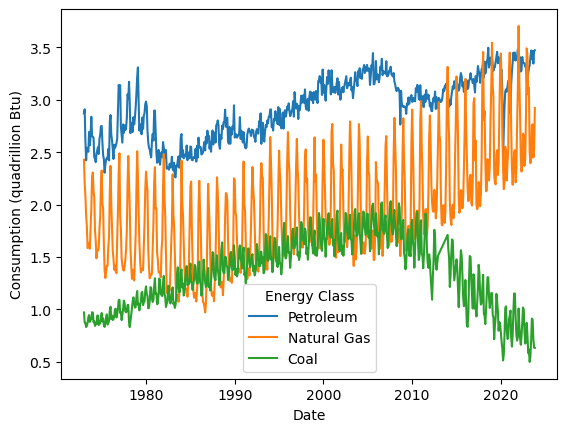

In [11]:
sns.lineplot(data=emi_com,x='Date',y='Consumption (quadrillion Btu)',hue='Energy Class',ci=None)

/var/folders/wk/48ywwld12k3b18wmjf4yr1080000gn/T/ipykernel_24436/3762310563.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=emi_com,x='Date',y='Emission per Consumption',hue='Energy Class',ci=None)


<Axes: xlabel='Date', ylabel='Emission per Consumption'>

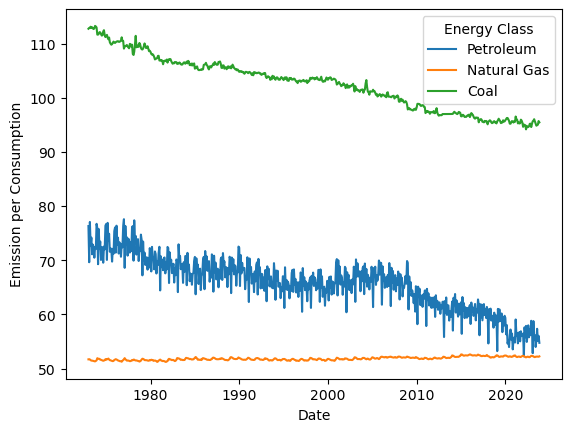

In [12]:
sns.lineplot(data=emi_com,x='Date',y='Emission per Consumption',hue='Energy Class',ci=None)

In [13]:
emi_com

,Unnamed: 0,Date,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,0,1973-01-01,2.869340,Petroleum,218.972,76.314422
2,611,1973-01-01,2.427938,Natural Gas,125.557,51.713427
3,1273,1973-01-01,0.971831,Coal,109.552,112.727474
4,865,1973-02-01,2.198380,Natural Gas,113.750,51.742646
5,203,1973-02-01,2.908295,Petroleum,202.519,69.634951
...,...,...,...,...,...,...
1867,763,2023-10-01,2.523908,Natural Gas,131.738,52.196043
1868,1372,2023-10-01,0.636075,Coal,60.868,95.693148
1869,1422,2023-11-01,0.633978,Coal,60.515,95.452783
1870,152,2023-11-01,3.471397,Petroleum,190.101,54.762110


In [14]:
# Cleaning oil data every time code: 

emi_com['Date'] = pd.to_datetime(emi_com['Date'])



/var/folders/wk/48ywwld12k3b18wmjf4yr1080000gn/T/ipykernel_24436/1637413727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emi_com['Date'] = pd.to_datetime(emi_com['Date'])


In [80]:
df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-01-01,0.136,0.018496,NaN,NaN,NaN,NaN
1,1850-02-01,-0.304,0.092416,NaN,NaN,NaN,NaN
2,1850-03-01,-1.071,1.147041,NaN,NaN,NaN,NaN
3,1850-04-01,-2.070,4.284900,NaN,NaN,NaN,NaN
4,1850-05-01,-1.889,3.568321,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3292,2023-10-01,NaN,NaN,2.523908,Natural Gas,131.738,52.196043
3293,2023-10-01,NaN,NaN,0.636075,Coal,60.868,95.693148
3294,2023-11-01,NaN,NaN,0.633978,Coal,60.515,95.452783
3295,2023-11-01,NaN,NaN,3.471397,Petroleum,190.101,54.762110


<Axes: xlabel='Date', ylabel='Emission (Mton Co2)'>

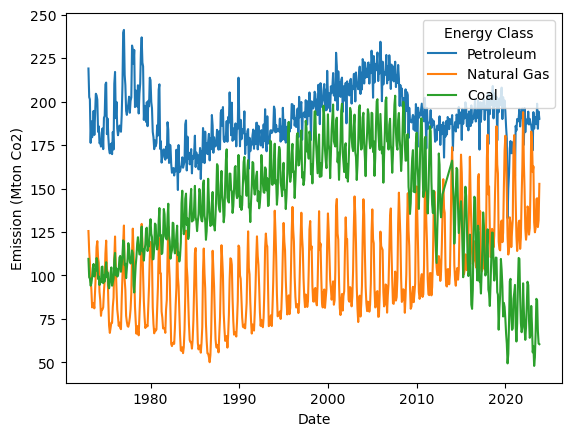

In [83]:
sns.lineplot(x=df['Date'],y=df['Emission (Mton Co2)'],hue=df['Energy Class'])

In [15]:
temp.drop('Unnamed: 0', axis=1, inplace=True)
temp.rename(columns={'date': 'Date'}, inplace=True) 
temp['Date'] = pd.to_datetime(temp['Date'])
temp.set_index('Date', inplace=True)
temp.sort_index(inplace=True)
#temp = temp[temp.index.year >= 1973]
temp['anomaly_squared'] = temp['anomaly'] ** 2



In [16]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1997 entries, 1850-01-01 to 2016-05-01
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anomaly          1997 non-null   float64
 1   anomaly_squared  1997 non-null   float64
dtypes: float64(2)
memory usage: 46.8 KB


In [17]:
temp

,anomaly,anomaly_squared
Date,,
1850-01-01,0.136,0.018496
1850-02-01,-0.304,0.092416
1850-03-01,-1.071,1.147041
1850-04-01,-2.070,4.284900
1850-05-01,-1.889,3.568321
...,...,...
2016-01-01,2.599,6.754801
2016-02-01,3.747,14.040009
2016-03-01,3.741,13.995081


In [18]:
emi_com.drop('Unnamed: 0', axis=1, inplace=True)


/var/folders/wk/48ywwld12k3b18wmjf4yr1080000gn/T/ipykernel_24436/4167695068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emi_com.drop('Unnamed: 0', axis=1, inplace=True)


In [19]:
df = pd.merge(temp, emi_com, on='Date', how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           3297 non-null   datetime64[ns]
 1   anomaly                        3027 non-null   float64       
 2   anomaly_squared                3027 non-null   float64       
 3   Consumption (quadrillion Btu)  1821 non-null   float64       
 4   Energy Class                   1821 non-null   object        
 5   Emission (Mton Co2)            1821 non-null   float64       
 6   Emission per Consumption       1821 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 180.4+ KB


In [20]:
df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-01-01,0.136,0.018496,NaN,NaN,NaN,NaN
1,1850-02-01,-0.304,0.092416,NaN,NaN,NaN,NaN
2,1850-03-01,-1.071,1.147041,NaN,NaN,NaN,NaN
3,1850-04-01,-2.070,4.284900,NaN,NaN,NaN,NaN
4,1850-05-01,-1.889,3.568321,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3292,2023-10-01,NaN,NaN,2.523908,Natural Gas,131.738,52.196043
3293,2023-10-01,NaN,NaN,0.636075,Coal,60.868,95.693148
3294,2023-11-01,NaN,NaN,0.633978,Coal,60.515,95.452783
3295,2023-11-01,NaN,NaN,3.471397,Petroleum,190.101,54.762110


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           3297 non-null   datetime64[ns]
 1   anomaly                        3027 non-null   float64       
 2   anomaly_squared                3027 non-null   float64       
 3   Consumption (quadrillion Btu)  1821 non-null   float64       
 4   Energy Class                   1821 non-null   object        
 5   Emission (Mton Co2)            1821 non-null   float64       
 6   Emission per Consumption       1821 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 180.4+ KB


<Axes: xlabel='Emission (Mton Co2)', ylabel='anomaly'>

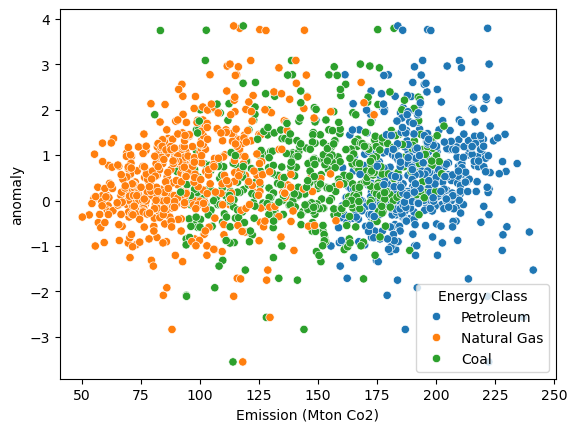

In [26]:
sns.scatterplot(x=df["Emission (Mton Co2)"], y=df["anomaly"], hue=df['Energy Class'])

In [27]:
df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-01-01,0.136,0.018496,NaN,NaN,NaN,NaN
1,1850-02-01,-0.304,0.092416,NaN,NaN,NaN,NaN
2,1850-03-01,-1.071,1.147041,NaN,NaN,NaN,NaN
3,1850-04-01,-2.070,4.284900,NaN,NaN,NaN,NaN
4,1850-05-01,-1.889,3.568321,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3292,2023-10-01,NaN,NaN,2.523908,Natural Gas,131.738,52.196043
3293,2023-10-01,NaN,NaN,0.636075,Coal,60.868,95.693148
3294,2023-11-01,NaN,NaN,0.633978,Coal,60.515,95.452783
3295,2023-11-01,NaN,NaN,3.471397,Petroleum,190.101,54.762110


[Text(0, 0.5, 'Anomaly in temperature (C)')]

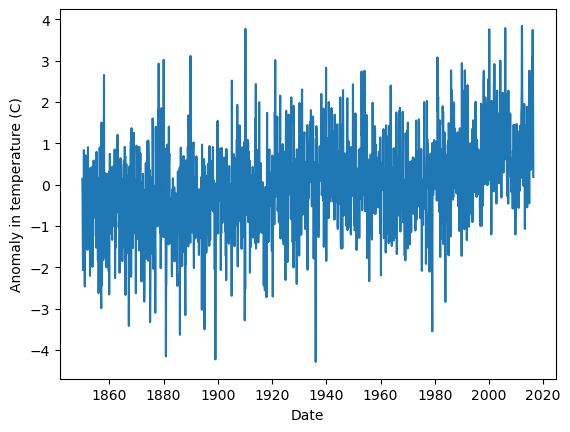

In [28]:
x = sns.lineplot(x=df['Date'],y=df['anomaly'])
x.set(ylabel='Anomaly in temperature (C)')

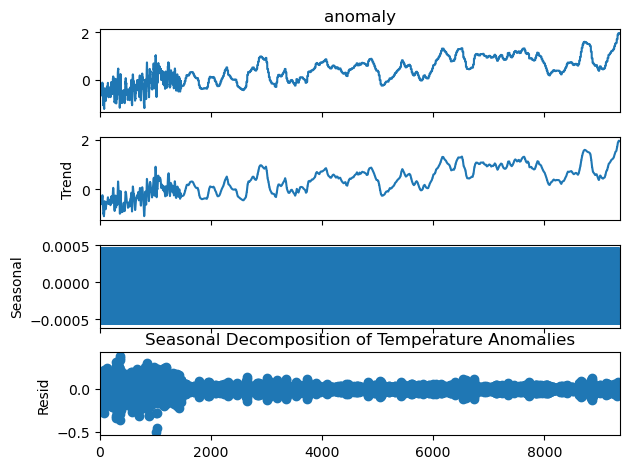

In [45]:
# seasonally decompose the emission data for different energy classes
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(df['anomaly'].dropna(), model='additive', period=12)
result.plot()

plt.title(f'Seasonal Decomposition of Temperature Anomalies')
plt.show()

In [26]:
df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Emission (Mton Co2),Energy Class,Emission per Consumption
0,1850-01-01,0.136,0.018496,NaN,NaN,NaN,NaN
1,1850-02-01,-0.304,0.092416,NaN,NaN,NaN,NaN
2,1850-03-01,-1.071,1.147041,NaN,NaN,NaN,NaN
3,1850-04-01,-2.070,4.284900,NaN,NaN,NaN,NaN
4,1850-05-01,-1.889,3.568321,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3292,2023-10-01,NaN,NaN,0.597154,61.127,Coal,102.363831
3293,2023-10-01,NaN,NaN,5.713680,399.680,Petroleum,69.951417
3294,2023-11-01,NaN,NaN,0.594755,60.845,Coal,102.302587
3295,2023-11-01,NaN,NaN,2.038047,146.596,Natural Gas,71.929639


<Axes: xlabel='anomaly', ylabel='Emission per Consumption'>

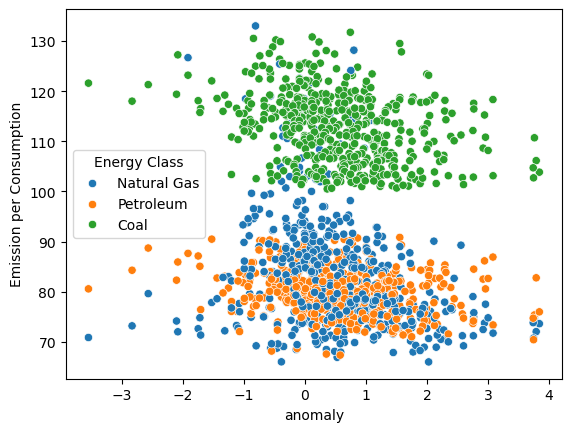

In [33]:
sns.scatterplot(x=df["anomaly"], x=df["Emission per Consumption"], hue=df['Energy Class'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5142 entries, 0 to 5141
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           5142 non-null   datetime64[ns]
 1   anomaly                        4602 non-null   float64       
 2   anomaly_squared                4602 non-null   float64       
 3   level_0                        3666 non-null   float64       
 4   index                          3666 non-null   float64       
 5   Consumption (quadrillion Btu)  3666 non-null   float64       
 6   Energy Class                   3666 non-null   object        
 7   Emission (Mton Co2)            3666 non-null   float64       
 8   Emission per Consumption       3666 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 361.7+ KB


In [28]:
df

,Date,anomaly,anomaly_squared,level_0,index,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-01-01,0.136,0.018496,NaN,NaN,NaN,NaN,NaN,NaN
1,1850-02-01,-0.304,0.092416,NaN,NaN,NaN,NaN,NaN,NaN
2,1850-03-01,-1.071,1.147041,NaN,NaN,NaN,NaN,NaN,NaN
3,1850-04-01,-2.070,4.284900,NaN,NaN,NaN,NaN,NaN,NaN
4,1850-05-01,-1.889,3.568321,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5137,2023-11-01,NaN,NaN,9327.0,16915.0,0.009775,Petroleum,0.970,99.234344
5138,2023-11-01,NaN,NaN,9328.0,14471.0,1.991292,Petroleum,146.444,73.542186
5139,2023-11-01,NaN,NaN,9329.0,1832.0,0.099089,Petroleum,6.246,63.034419
5140,2023-11-01,NaN,NaN,9331.0,7138.0,0.461447,Petroleum,30.972,67.119335


<Axes: xlabel='Consumption (quadrillion Btu)', ylabel='Emission (Mton Co2)'>

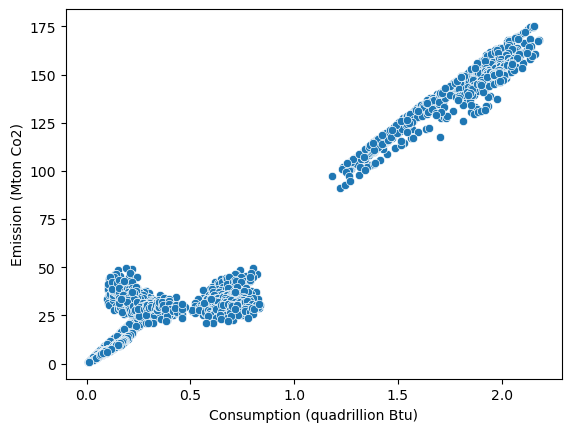

In [29]:

sns.scatterplot(x=df['Consumption (quadrillion Btu)'],y=df['Emission (Mton Co2)'])

<Axes: xlabel='Date'>

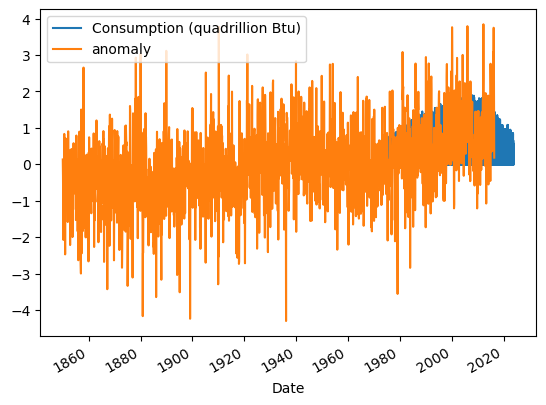

In [22]:
df.plot(x='Date',y=['Consumption (quadrillion Btu)','anomaly'])
# cosumption causes anomaly 

In [29]:
temp.reset_index(inplace=True)

In [30]:
temp['Date'] = pd.to_datetime(temp['Date'])

In [24]:
df.loc[df['Date'] == '2023-11-01']

,Date,anomaly,anomaly_squared,level_0,index,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
10794,2023-11-01,NaN,NaN,9330.0,5306.0,0.080477,Petroleum,5.469,67.956895
10795,2023-11-01,NaN,NaN,9327.0,16915.0,0.009775,Petroleum,0.970,99.234344
10796,2023-11-01,NaN,NaN,9328.0,14471.0,1.991292,Petroleum,146.444,73.542186
10797,2023-11-01,NaN,NaN,9329.0,1832.0,0.099089,Petroleum,6.246,63.034419
10798,2023-11-01,NaN,NaN,5665.0,17526.0,0.510317,Natural Gas,27.052,53.010208
10799,2023-11-01,NaN,NaN,5666.0,22582.0,0.569486,Coal,53.343,93.668652
10800,2023-11-01,NaN,NaN,5658.0,19359.0,0.997830,Natural Gas,52.640,52.754487
10801,2023-11-01,NaN,NaN,5659.0,18137.0,0.358540,Natural Gas,19.006,53.009478
10802,2023-11-01,NaN,NaN,5660.0,18748.0,0.171361,Natural Gas,47.898,279.515285
10803,2023-11-01,NaN,NaN,5661.0,21983.0,0.000000,Coal,0.000,NaN


In [31]:
from numpy import log


In [32]:
final_df = df.drop(['Energy Class'],axis=1)

final_df = final_df[np.isfinite(final_df).all(1)]



In [33]:
final_df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Emission (Mton Co2),Emission per Consumption
1476,1973-01-01,-0.478,0.228484,2.869340,218.972,76.314422
1477,1973-01-01,-0.478,0.228484,2.427938,125.557,51.713427
1478,1973-01-01,-0.478,0.228484,0.971831,109.552,112.727474
1479,1973-02-01,0.118,0.013924,2.198380,113.750,51.742646
1480,1973-02-01,0.118,0.013924,2.908295,202.519,69.634951
...,...,...,...,...,...,...
3022,2016-04-01,1.889,3.568321,0.833586,80.832,96.969026
3023,2016-04-01,1.889,3.568321,3.101590,187.761,60.537024
3024,2016-05-01,0.186,0.034596,3.113219,190.774,61.278692
3025,2016-05-01,0.186,0.034596,2.032725,106.555,52.419782


In [34]:
final_df[['Consumption (quadrillion Btu)','Emission (Mton Co2)',	'Emission per Consumption',	'anomaly']].corr(method='pearson')

,Consumption (quadrillion Btu),Emission (Mton Co2),Emission per Consumption,anomaly
Consumption (quadrillion Btu),1.000000,0.728398,-0.450246,0.121321
Emission (Mton Co2),0.728398,1.000000,0.260627,0.098485
Emission per Consumption,-0.450246,0.260627,1.000000,-0.030765
anomaly,0.121321,0.098485,-0.030765,1.000000


In [35]:
final_df['Consumption (quadrillion Btu)'] = log(final_df['Consumption (quadrillion Btu)'])
final_df['Emission (Mton Co2)'] = log(final_df['Emission (Mton Co2)'])
final_df['Emission per Consumption'] = log(final_df['Emission per Consumption'])

In [36]:
final_df = final_df[np.isfinite(final_df).all(1)]

In [39]:
final_df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Emission (Mton Co2),Emission per Consumption
1476,1973-01-01,-0.478,0.228484,1.054082,5.388944,4.334862
1477,1973-01-01,-0.478,0.228484,0.887042,4.832760,3.945717
1478,1973-01-01,-0.478,0.228484,-0.028574,4.696399,4.724973
1479,1973-02-01,0.118,0.013924,0.787721,4.734003,3.946282
1480,1973-02-01,0.118,0.013924,1.067567,5.310834,4.243267
...,...,...,...,...,...,...
3022,2016-04-01,1.889,3.568321,-0.182019,4.392373,4.574392
3023,2016-04-01,1.889,3.568321,1.131915,5.235170,4.103255
3024,2016-05-01,0.186,0.034596,1.135657,5.251089,4.115432
3025,2016-05-01,0.186,0.034596,0.709377,4.668661,3.959284


In [40]:
from statsmodels.tsa.stattools import adfuller
result= adfuller(df['Consumption (quadrillion Btu)'].dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.236370
p-value: 0.000571
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject Ho - Time Series is Stationary


In [41]:
df


,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-01-01,0.136,0.018496,NaN,NaN,NaN,NaN
1,1850-02-01,-0.304,0.092416,NaN,NaN,NaN,NaN
2,1850-03-01,-1.071,1.147041,NaN,NaN,NaN,NaN
3,1850-04-01,-2.070,4.284900,NaN,NaN,NaN,NaN
4,1850-05-01,-1.889,3.568321,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3292,2023-10-01,NaN,NaN,2.523908,Natural Gas,131.738,52.196043
3293,2023-10-01,NaN,NaN,0.636075,Coal,60.868,95.693148
3294,2023-11-01,NaN,NaN,0.633978,Coal,60.515,95.452783
3295,2023-11-01,NaN,NaN,3.471397,Petroleum,190.101,54.762110


In [42]:
df


,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-01-01,0.136,0.018496,NaN,NaN,NaN,NaN
1,1850-02-01,-0.304,0.092416,NaN,NaN,NaN,NaN
2,1850-03-01,-1.071,1.147041,NaN,NaN,NaN,NaN
3,1850-04-01,-2.070,4.284900,NaN,NaN,NaN,NaN
4,1850-05-01,-1.889,3.568321,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3292,2023-10-01,NaN,NaN,2.523908,Natural Gas,131.738,52.196043
3293,2023-10-01,NaN,NaN,0.636075,Coal,60.868,95.693148
3294,2023-11-01,NaN,NaN,0.633978,Coal,60.515,95.452783
3295,2023-11-01,NaN,NaN,3.471397,Petroleum,190.101,54.762110


<Axes: xlabel='Consumption (quadrillion Btu)', ylabel='Emission (Mton Co2)'>

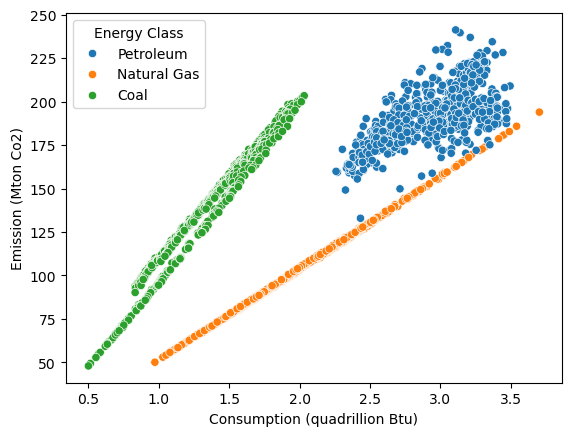

In [43]:
sns.scatterplot
sns.scatterplot(y=emi_com['Emission (Mton Co2)'],x=emi_com['Consumption (quadrillion Btu)'], hue=emi_com['Energy Class'])

In [44]:
temp.reset_index(inplace=True)

In [45]:
temp.drop(['index'],axis=1,inplace=True)

In [46]:
final_df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Emission (Mton Co2),Emission per Consumption
1476,1973-01-01,-0.478,0.228484,1.054082,5.388944,4.334862
1477,1973-01-01,-0.478,0.228484,0.887042,4.832760,3.945717
1478,1973-01-01,-0.478,0.228484,-0.028574,4.696399,4.724973
1479,1973-02-01,0.118,0.013924,0.787721,4.734003,3.946282
1480,1973-02-01,0.118,0.013924,1.067567,5.310834,4.243267
...,...,...,...,...,...,...
3022,2016-04-01,1.889,3.568321,-0.182019,4.392373,4.574392
3023,2016-04-01,1.889,3.568321,1.131915,5.235170,4.103255
3024,2016-05-01,0.186,0.034596,1.135657,5.251089,4.115432
3025,2016-05-01,0.186,0.034596,0.709377,4.668661,3.959284


In [47]:
lag_squared_emi = final_df.copy()

In [48]:
df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-01-01,0.136,0.018496,NaN,NaN,NaN,NaN
1,1850-02-01,-0.304,0.092416,NaN,NaN,NaN,NaN
2,1850-03-01,-1.071,1.147041,NaN,NaN,NaN,NaN
3,1850-04-01,-2.070,4.284900,NaN,NaN,NaN,NaN
4,1850-05-01,-1.889,3.568321,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3292,2023-10-01,NaN,NaN,2.523908,Natural Gas,131.738,52.196043
3293,2023-10-01,NaN,NaN,0.636075,Coal,60.868,95.693148
3294,2023-11-01,NaN,NaN,0.633978,Coal,60.515,95.452783
3295,2023-11-01,NaN,NaN,3.471397,Petroleum,190.101,54.762110


In [51]:
y = df.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 1551 entries, 1476 to 3026
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lag_0    1551 non-null   float64
 1   anomaly  1551 non-null   float64
dtypes: float64(2)
memory usage: 36.4 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1550 entries, 1477 to 3026
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lag_1    1550 non-null   float64
 1   anomaly  1550 non-null   float64
dtypes: float64(2)
memory usage: 36.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 1478 to 3026
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lag_2    1549 non-null   float64
 1   anomaly  1549 non-null   float64
dtypes: float64(2)
memory usage: 36.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1548 entries, 1479 to 3026
Data columns (total 2 columns):
 #   

<Axes: >

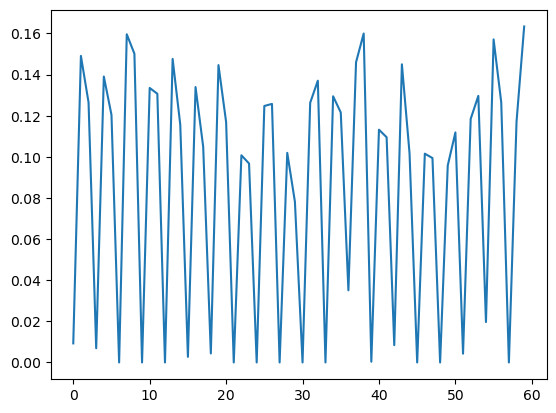

In [53]:
from sklearn.feature_selection import mutual_info_regression 

#  to shift by two month intervals and create columns with lags

for x in range(0,60):

    y['lag_'+str(x)] = y['Emission per Consumption'].shift(x)

# to find the mutual information information between two variables. Chengyi, if you use this make sure to look at the assumptions of this. 
    
lag_mut_info = {}

for i in range(0,60):
    lg = 'lag_'+str(i)
    x = y[[lg,'anomaly']]
    x = x[np.isfinite(x).all(1)]
    x.dropna(inplace=True)
    x.info()
    mutual_info = mutual_info_regression(x.drop(['anomaly'],axis=1),x['anomaly'])
    lag_mut_info[i] = mutual_info[0]
# to find where the ideal lag is 
ideal_lag = 0 
max  = 0 
for i in lag_mut_info:
    if lag_mut_info[i] > max:
        max = lag_mut_info[i]
        ideal_lag = i
print(ideal_lag,max)

sns.lineplot(lag_mut_info)

# 20 month lag for shifting emission to correlate with temp 
# 36 month lag for shifting to get 0.12 correlation between how consumtpion affects anomaly 
# 22 month lag for shifting to get 0.21 correlation between hwo emission affects temp
# 8 month lag for shifting to get 0.26 correlation between how emi/com affects temp 
# 0 2.9842615624172297 for shifting consumption to predict emission 



NameError: name 'a' is not defined

<Axes: xlabel='Emission per Consumption', ylabel='anomaly'>

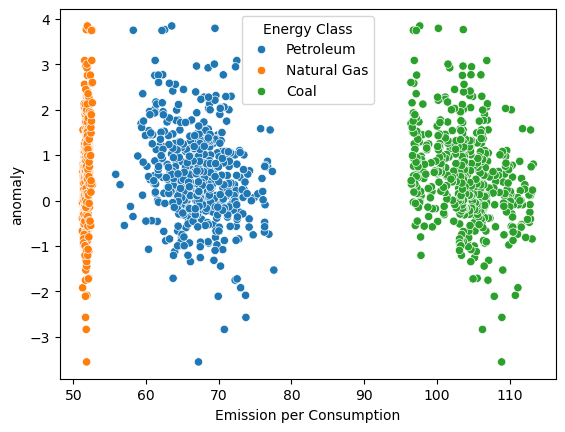

In [90]:
sns.scatterplot(y=df['anomaly'],x=df['Emission per Consumption'],hue=df['Energy Class'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

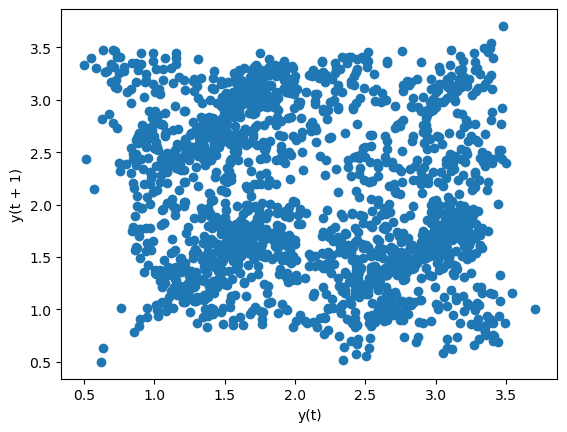

In [86]:
pd.plotting.lag_plot((df['Consumption (quadrillion Btu)']), lag=1)

In [55]:
df

,Date,anomaly,anomaly_squared,level_0,index,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-01-01,0.136,0.018496,NaN,NaN,NaN,NaN,NaN,NaN
1,1850-02-01,-0.304,0.092416,NaN,NaN,NaN,NaN,NaN,NaN
2,1850-03-01,-1.071,1.147041,NaN,NaN,NaN,NaN,NaN,NaN
3,1850-04-01,-2.070,4.284900,NaN,NaN,NaN,NaN,NaN,NaN
4,1850-05-01,-1.889,3.568321,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5137,2023-11-01,NaN,NaN,9327.0,16915.0,0.009775,Petroleum,0.970,99.234344
5138,2023-11-01,NaN,NaN,9328.0,14471.0,1.991292,Petroleum,146.444,73.542186
5139,2023-11-01,NaN,NaN,9329.0,1832.0,0.099089,Petroleum,6.246,63.034419
5140,2023-11-01,NaN,NaN,9331.0,7138.0,0.461447,Petroleum,30.972,67.119335


In [56]:
temp['anomaly']

0       0.136
1      -0.304
2      -1.071
3      -2.070
4      -1.889
        ...  
1992    2.599
1993    3.747
1994    3.741
1995    1.889
1996    0.186
Name: anomaly, Length: 1997, dtype: float64

In [57]:
x = df['Emission per Consumption'].dropna()

In [58]:
x

1476    282.762039
1477     90.118908
1478     80.006442
1479     99.859750
1480     66.458488
           ...    
5137     99.234344
5138     73.542186
5139     63.034419
5140     67.119335
5141     37.346426
Name: Emission per Consumption, Length: 3666, dtype: float64

In [59]:
temp

,Date,anomaly,anomaly_squared
0,1850-01-01,0.136,0.018496
1,1850-02-01,-0.304,0.092416
2,1850-03-01,-1.071,1.147041
3,1850-04-01,-2.070,4.284900
4,1850-05-01,-1.889,3.568321
...,...,...,...
1992,2016-01-01,2.599,6.754801
1993,2016-02-01,3.747,14.040009
1994,2016-03-01,3.741,13.995081
1995,2016-04-01,1.889,3.568321


/Users/ishitajain/anaconda3/envs/env311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='y(t)', ylabel='y(t + 15)'>

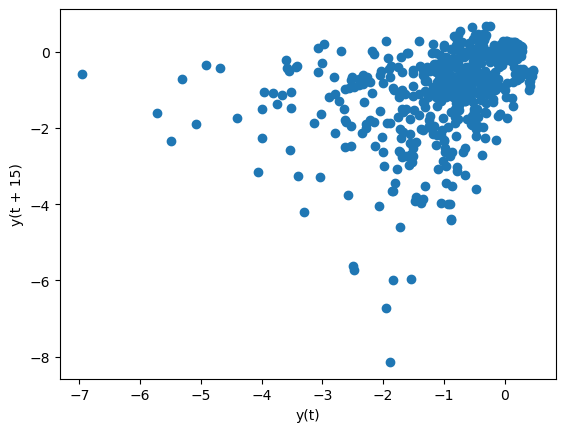

In [90]:
pd.plotting.lag_plot(log(temp['anomaly']), lag=15)

In [60]:
# exponential time series 
final_df['Emission per Consumption']

1476    5.644606
1477    4.501130
1478    4.382107
1479    4.603767
1480    4.196578
          ...   
4597    4.419336
4598    3.664769
4599    4.338103
4600    4.249260
4601    4.710787
Name: Emission per Consumption, Length: 3126, dtype: float64

In [61]:
ptrl = df.loc[df['Energy Class'] == 'Petroleum']
coal = df.loc[df['Energy Class'] == 'Coal']
gas = df.loc[df['Energy Class'] == 'Natural Gas']


In [65]:
df[['Consumption (quadrillion Btu)','Emission (Mton Co2)','Emission per Consumption',	'anomaly']].corr(method='pearson') 

,Consumption (quadrillion Btu),Emission (Mton Co2),Emission per Consumption,anomaly
Consumption (quadrillion Btu),1.000000,0.752346,-0.522359,0.121321
Emission (Mton Co2),0.752346,1.000000,0.139974,0.098485
Emission per Consumption,-0.522359,0.139974,1.000000,-0.030765
anomaly,0.121321,0.098485,-0.030765,1.000000


In [61]:
x = df.dropna()


In [62]:
df

,Date,anomaly,anomaly_squared,level_0,index,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-01-01,0.136,0.018496,NaN,NaN,NaN,NaN,NaN,NaN
1,1850-02-01,-0.304,0.092416,NaN,NaN,NaN,NaN,NaN,NaN
2,1850-03-01,-1.071,1.147041,NaN,NaN,NaN,NaN,NaN,NaN
3,1850-04-01,-2.070,4.284900,NaN,NaN,NaN,NaN,NaN,NaN
4,1850-05-01,-1.889,3.568321,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5137,2023-11-01,NaN,NaN,9327.0,16915.0,0.009775,Petroleum,0.970,99.234344
5138,2023-11-01,NaN,NaN,9328.0,14471.0,1.991292,Petroleum,146.444,73.542186
5139,2023-11-01,NaN,NaN,9329.0,1832.0,0.099089,Petroleum,6.246,63.034419
5140,2023-11-01,NaN,NaN,9331.0,7138.0,0.461447,Petroleum,30.972,67.119335


In [102]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(ptrl[[ 'anomaly','Emission (Mton Co2)']].dropna(), maxlag=[32])


Granger Causality
number of lags (no zero) 32
ssr based F test:         F=1.0125  , p=0.4513  , df_denom=424, df_num=32
ssr based chi2 test:   chi2=37.3681 , p=0.2360  , df=32
likelihood ratio test: chi2=36.0091 , p=0.2863  , df=32
parameter F test:         F=1.0125  , p=0.4513  , df_denom=424, df_num=32


{32: ({'ssr_ftest': (1.0125298197856694, 0.4512827529000277, 424.0, 32),
   'ssr_chi2test': (37.36808165095791, 0.2360290555574716, 32),
   'lrtest': (36.00910597924826, 0.2862952697043541, 32),
   'params_ftest': (1.012529819785653, 0.4512827529000533, 424.0, 32.0)},
   array([[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 1., 0., 0.],
          [0., 0., 0., ..., 0., 1., 0.]])])}

In [47]:
df

,Date,anomaly,anomaly_squared,level_0,index,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-01-01,0.136,0.018496,NaN,NaN,NaN,NaN,NaN,NaN
1,1850-02-01,-0.304,0.092416,NaN,NaN,NaN,NaN,NaN,NaN
2,1850-03-01,-1.071,1.147041,NaN,NaN,NaN,NaN,NaN,NaN
3,1850-04-01,-2.070,4.284900,NaN,NaN,NaN,NaN,NaN,NaN
4,1850-05-01,-1.889,3.568321,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10804,2023-11-01,NaN,NaN,5662.0,21384.0,0.023901,Coal,7.254,303.496793
10805,2023-11-01,NaN,NaN,5663.0,20593.0,0.000696,Coal,0.124,178.156477
10806,2023-11-01,NaN,NaN,5664.0,20592.0,0.000672,Coal,0.124,184.613675
10807,2023-11-01,NaN,NaN,9331.0,7138.0,0.461447,Petroleum,30.972,67.119335


In [62]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df[[ 'Consumption (quadrillion Btu)','anomaly']].dropna(), maxlag=38)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.1341  , p=0.0025  , df_denom=7979, df_num=1
ssr based chi2 test:   chi2=9.1375  , p=0.0025  , df=1
likelihood ratio test: chi2=9.1323  , p=0.0025  , df=1
parameter F test:         F=9.1341  , p=0.0025  , df_denom=7979, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.7324  , p=0.0033  , df_denom=7976, df_num=2
ssr based chi2 test:   chi2=11.4721 , p=0.0032  , df=2
likelihood ratio test: chi2=11.4638 , p=0.0032  , df=2
parameter F test:         F=5.7324  , p=0.0033  , df_denom=7976, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.3050  , p=0.0048  , df_denom=7973, df_num=3
ssr based chi2 test:   chi2=12.9262 , p=0.0048  , df=3
likelihood ratio test: chi2=12.9158 , p=0.0048  , df=3
parameter F test:         F=4.3050  , p=0.0048  , df_denom=7973, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.9091  , p=0.

{1: ({'ssr_ftest': (9.134096165712979, 0.002516854869635295, 7979.0, 1),
   'ssr_chi2test': (9.137530466815518, 0.0025041887401981936, 1),
   'lrtest': (9.132304283119083, 0.002511352161195871, 1),
   'params_ftest': (9.134096165714386, 0.0025168548696344164, 7979.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (5.732441438913638, 0.003252519304753162, 7976.0, 2),
   'ssr_chi2test': (11.472069990965334, 0.0032275401495777387, 2),
   'lrtest': (11.463832777097196, 0.003240860530695416, 2),
   'params_ftest': (5.732441438915083, 0.003252519304748832, 7976.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (4.304967908969252, 0.004846021138423927, 7973.0, 3),
   'ssr_chi2test': (12.926242536149996, 0.004798855728287903, 3),
   'lrtest': (12.915784670909488, 0.004822310940134234, 3),
   'params_ftest': (4.304967908969103, 0.004846021138425343, 7973.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.]

In [49]:
df

,Date,anomaly,anomaly_squared,level_0,index,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-01-01,0.136,0.018496,NaN,NaN,NaN,NaN,NaN,NaN
1,1850-02-01,-0.304,0.092416,NaN,NaN,NaN,NaN,NaN,NaN
2,1850-03-01,-1.071,1.147041,NaN,NaN,NaN,NaN,NaN,NaN
3,1850-04-01,-2.070,4.284900,NaN,NaN,NaN,NaN,NaN,NaN
4,1850-05-01,-1.889,3.568321,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10804,2023-11-01,NaN,NaN,5662.0,21384.0,0.023901,Coal,7.254,303.496793
10805,2023-11-01,NaN,NaN,5663.0,20593.0,0.000696,Coal,0.124,178.156477
10806,2023-11-01,NaN,NaN,5664.0,20592.0,0.000672,Coal,0.124,184.613675
10807,2023-11-01,NaN,NaN,9331.0,7138.0,0.461447,Petroleum,30.972,67.119335


In [53]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [57]:
maxlag = 38
test   = 'ssr_chi2test'

In [56]:
from statsmodels.tsa.stattools import grangercausalitytests

In [60]:
final_df.columns



Index(['Date', 'anomaly', 'anomaly_squared', 'Consumption (quadrillion Btu)',
       'Emission (Mton Co2)', 'Emission per Consumption'],
      dtype='object')

In [52]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(final_df[['anomaly','Emission (Mton Co2)']], maxlag=40)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7763  , p=0.3783  , df_denom=3122, df_num=1
ssr based chi2 test:   chi2=0.7771  , p=0.3780  , df=1
likelihood ratio test: chi2=0.7770  , p=0.3781  , df=1
parameter F test:         F=0.7763  , p=0.3783  , df_denom=3122, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4378  , p=0.6455  , df_denom=3119, df_num=2
ssr based chi2 test:   chi2=0.8770  , p=0.6450  , df=2
likelihood ratio test: chi2=0.8769  , p=0.6450  , df=2
parameter F test:         F=0.4378  , p=0.6455  , df_denom=3119, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3564  , p=0.7845  , df_denom=3116, df_num=3
ssr based chi2 test:   chi2=1.0715  , p=0.7839  , df=3
likelihood ratio test: chi2=1.0714  , p=0.7840  , df=3
parameter F test:         F=0.3564  , p=0.7845  , df_denom=3116, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4994  , p=0.

{1: ({'ssr_ftest': (0.7763322920983704, 0.3783330319127334, 3122.0, 1),
   'ssr_chi2test': (0.7770782872541344, 0.37803619547416467, 1),
   'lrtest': (0.7769816871596049, 0.37806583961104967, 1),
   'params_ftest': (0.7763322920962117, 0.378333031913372, 3122.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.43780037335287564, 0.6454942782907347, 3119.0, 2),
   'ssr_chi2test': (0.8770044029204126, 0.6450017806708299, 2),
   'lrtest': (0.8768813246852005, 0.6450414747326232, 2),
   'params_ftest': (0.4378003733525705, 0.64549427829107, 3119.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.3563791538393205, 0.784532026034241, 3116.0, 3),
   'ssr_chi2test': (1.0715392465727194, 0.7839486803898076, 3),
   'lrtest': (1.0713554595422465, 0.7839930973167512, 3),
   'params_ftest': (0.35637915383882307, 0.7845320260345755, 3116.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.

In [61]:
grangers_causation_matrix(final_df, variables =final_df[['anomaly', 'anomaly_squared', 'Consumption (quadrillion Btu)',
       'Emission (Mton Co2)', 'Emission per Consumption']] )  


ValueError: Index data must be 1-dimensional

In [54]:
df.drop(['level_0','index'],axis=1,inplace=True)

In [57]:
df['Energy Class'].value_counts()

Energy Class
Petroleum      3666
Coal           3223
Natural Gas    2444
Name: count, dtype: int64

In [56]:
df_coal = df.loc[df['Energy Class'] == 'Coal']
df_coal

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
1479,1973-01-01,-0.274042,0.075099,0.000000,Coal,0.000,NaN
1480,1973-01-01,-0.274042,0.075099,0.663980,Coal,73.112,110.111808
1481,1973-01-01,-0.274042,0.075099,0.017044,Coal,1.945,114.117629
1483,1973-01-01,-0.274042,0.075099,0.151120,Coal,33.480,221.545564
1484,1973-01-01,-0.274042,0.075099,0.010010,Coal,1.142,114.087500
...,...,...,...,...,...,...,...
10793,2023-11-01,NaN,NaN,0.569486,Coal,53.343,93.668652
10797,2023-11-01,NaN,NaN,0.000000,Coal,0.000,NaN
10798,2023-11-01,NaN,NaN,0.023901,Coal,7.254,303.496793
10799,2023-11-01,NaN,NaN,0.000696,Coal,0.124,178.156477


In [58]:
df_gas = df.loc[df['Energy Class'] == 'Natural Gas']
df_gas

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
1470,1973-01-01,-0.274042,0.075099,0.231730,Natural Gas,12.163,52.487917
1476,1973-01-01,-0.274042,0.075099,0.000000,Natural Gas,42.370,inf
1478,1973-01-01,-0.274042,0.075099,0.405671,Natural Gas,21.209,52.281226
1482,1973-01-01,-0.274042,0.075099,0.872631,Natural Gas,45.623,52.282138
1493,1973-02-01,-0.265500,0.070490,0.407704,Natural Gas,21.316,52.282982
...,...,...,...,...,...,...,...
10786,2023-10-01,NaN,NaN,0.235644,Natural Gas,12.497,53.033295
10792,2023-11-01,NaN,NaN,0.510317,Natural Gas,27.052,53.010208
10794,2023-11-01,NaN,NaN,0.997830,Natural Gas,52.640,52.754487
10795,2023-11-01,NaN,NaN,0.358540,Natural Gas,19.006,53.009478


In [59]:
df_petrol = df.loc[df['Energy Class'] == 'Petroleum']
df_petrol

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
1471,1973-01-01,-0.274042,0.075099,0.149684,Petroleum,42.325,282.762039
1472,1973-01-01,-0.274042,0.075099,0.193211,Petroleum,17.412,90.118908
1473,1973-01-01,-0.274042,0.075099,0.390419,Petroleum,31.236,80.006442
1474,1973-01-01,-0.274042,0.075099,0.262598,Petroleum,26.223,99.859750
1475,1973-01-01,-0.274042,0.075099,0.636864,Petroleum,42.325,66.458488
...,...,...,...,...,...,...,...
10789,2023-11-01,NaN,NaN,0.009775,Petroleum,0.970,99.234344
10790,2023-11-01,NaN,NaN,1.991292,Petroleum,146.444,73.542186
10791,2023-11-01,NaN,NaN,0.099089,Petroleum,6.246,63.034419
10801,2023-11-01,NaN,NaN,0.461447,Petroleum,30.972,67.119335
